# Analyzing Amazon Forest Fire Dataset

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('amazon.csv',encoding='ISO-8859–1')

In [6]:
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


# Check For Duplicate Data and Drop Them

In [7]:
df.duplicated().any()

True

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().any()

False

#  Check Null Values In The Dataset

In [12]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

<Axes: >

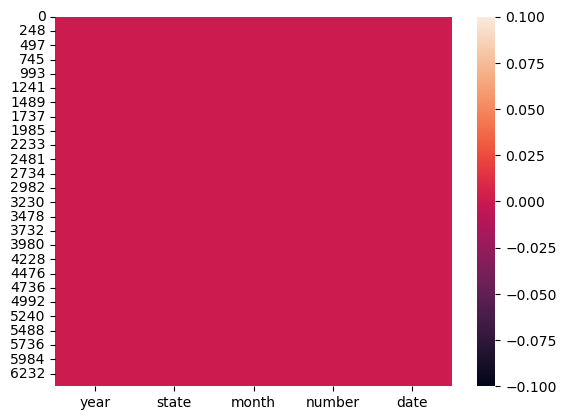

In [13]:
sns.heatmap(df.isnull())

# Get Overall Statistics About The Dataframe

In [14]:
df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


# Rename Month Names To English

In [17]:
df['new month'] = df['month'].map({'Janeiro': 'Jan','Fevereiro': 'Feb','Março': 'Mar','Abril':'Apr','Maio': 'May','Junho':'June','Julho' : 'July','Agosto': 'Aug','Setembro': 'Sept','Outubro': 'Oct','Novembro':'Nov','Dezembro': 'Dec'})

C:\Users\goela\AppData\Local\Temp\ipykernel_20188\170451331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new month'] = df['month'].map({'Janeiro': 'Jan','Fevereiro': 'Feb','Março': 'Mar','Abril':'Apr','Maio': 'May','Junho':'June','Julho' : 'July','Agosto': 'Aug','Setembro': 'Sept','Outubro': 'Oct','Novembro':'Nov','Dezembro': 'Dec'})


In [18]:
df

,year,state,month,number,date,new month
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,Dec
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,Dec
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,Dec
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,Dec


# Total Number of Fires Registered

In [23]:
df.shape
df.shape[0]

6422

# In Which Month Maximum Number of Forest Fires Were Reported?

In [36]:
df.groupby('new month')['number'].sum().sort_values(ascending = False).head(1)

new month
July    92319.113
Name: number, dtype: float64

#  In Which Year Maximum Number of Forest Fires Was Reported?

In [42]:
df.groupby('year')['number'].sum().sort_values(ascending = False).head(1)

year
2003    42760.674
Name: number, dtype: float64

# In Which State Maximum Number of Forest Fires Was Reported?

In [46]:
df.groupby('state')['number'].sum().sort_values(ascending = False).head(1)

state
Mato Grosso    96246.028
Name: number, dtype: float64

# Find Total Number of Fires Were Reported In Amazonas

In [52]:
df[df['state'] == 'Amazonas'].groupby('state')['number'].sum()

state
Amazonas    30650.129
Name: number, dtype: float64

# Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [55]:
df1 = df[df['state'] == 'Amazonas']
df1.groupby('year')['number'].sum()


year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64

# Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [64]:
df2 = df[df['year'] == 2015].groupby('new month')['number'].sum().reset_index()

<Axes: xlabel='new month', ylabel='number'>

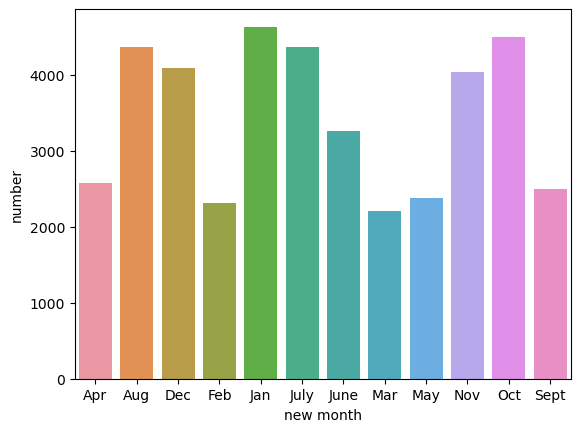

In [65]:
sns.barplot(x = 'new month',y = 'number',data = df2)

#  Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [66]:
df.groupby('state')['number'].mean().sort_values(ascending = False)

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

# To Find The State Names Where Fires Were Reported In 'dec' Month

In [69]:
df[df['new month'] == 'Dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)